<a href="https://colab.research.google.com/github/Mahdi-Saadati/Machine-Learning-2/blob/main/1.d.%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">
این مدل، قیمت خانه‌ها را بر اساس ویژگی‌هایی مثل تعداد اتاق، سن ساختمان و ... پیش‌بینی می‌کند.



2.6016254395785847e-15
0.9999999999999993
Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 572.5185  
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 599.7842 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 569.0132 
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 556.4273 
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 548.0069 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 573.9211 
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 582.3135 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 567.5408 
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 530.7972 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 550.4423 
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 548.4281 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 530.5198 
Epoch 13/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 537.7297 
Epoch 14/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 527.6180 
Epoch 15/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 524.3964  

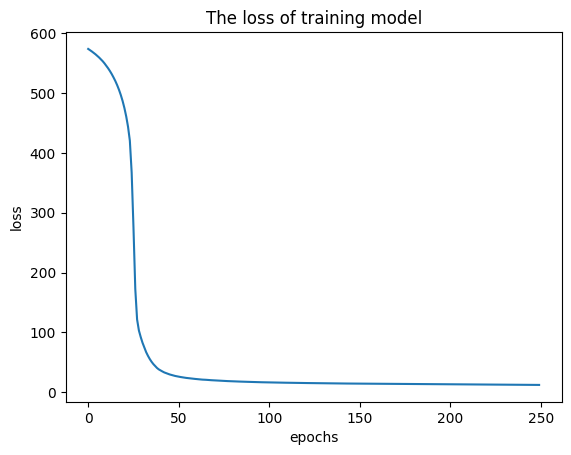

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.7008 
18.51921844482422


In [18]:
import numpy as np                               # وارد کردن کتابخانه numpy برای کار با آرایه‌های عددی
import keras                                     # وارد کردن کتابخانه keras برای ساخت مدل‌های یادگیری ماشین
import matplotlib.pyplot as plt                  # وارد کردن matplotlib برای رسم نمودار

from keras.datasets import boston_housing        # وارد کردن دیتاست قیمت خانه‌های بوستون از keras
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()  # بارگذاری داده‌ها و تقسیم به آموزش و تست

### Feature Scaling
from sklearn.preprocessing import StandardScaler # وارد کردن ابزار نرمال‌سازی داده‌ها از sklearn
sc = StandardScaler()                            # ساخت شی استانداردسازی
x_train = sc.fit_transform(x_train)              # نرمال‌سازی داده‌های آموزش (میانگین صفر، انحراف معیار یک)
print(np.mean(x_train))                          # چاپ میانگین داده‌های آموزش (باید نزدیک به صفر باشد)
print(np.std(x_train))                           # چاپ انحراف معیار داده‌های آموزش (باید نزدیک به ۱ باشد)
x_test = sc.transform(x_test)                    # نرمال‌سازی داده‌های تست (با همان مقیاس آموزش)

from keras.models import Sequential              # وارد کردن مدل ترتیبی Sequential از Keras
from keras.layers import Dense                   # وارد کردن لایه Dense (کاملاً متصل)
from keras.layers import Activation              # وارد کردن تابع فعال‌سازی Activation

Model = Sequential()                             # ایجاد یک مدل ترتیبی
Model.add(Dense(10, input_dim=13))               # اضافه کردن لایه اول با ۱۰ نورون، ورودی‌ها ۱۳ ویژگی هستند
Model.add(Activation('relu'))                    # استفاده از تابع فعال‌سازی ReLU برای لایه اول
Model.add(Dense(5))                              # اضافه کردن لایه دوم با ۵ نورون
Model.add(Activation('relu'))                    # تابع ReLU برای لایه دوم
Model.add(Dense(1))                              # لایه خروجی با یک نورون (پیش‌بینی یک عدد: قیمت خانه)

from tensorflow.keras.optimizers import Adadelta # وارد کردن بهینه‌ساز Adadelta از tensorflow.keras
Model.compile(loss='mse',                        # کامپایل (آماده‌سازی) مدل با تابع خطای MSE (میانگین مربعات خطا)
              optimizer=Adadelta(learning_rate=0.4))  # استفاده از بهینه‌ساز Adadelta با نرخ یادگیری ۰.۴

history = Model.fit(x_train, y_train, epochs=250,      # آموزش مدل روی داده‌های آموزش، در ۲۵۰ دوره
          batch_size=64)                               # استفاده از batch با اندازه ۶۴

a = history.history                                    # ذخیره تاریخچه آموزش (برای رسم نمودار و تحلیل)
print(history.history['loss'])                         # چاپ مقادیر خطای آموزش در هر epoch
plt.plot(history.history['loss'])                      # رسم نمودار تغییر خطا در طول آموزش
plt.title('The loss of training model')                # عنوان نمودار
plt.xlabel('epochs')                                   # برچسب محور x (دوره‌ها)
plt.ylabel('loss')                                     # برچسب محور y (مقدار خطا)
plt.show()                                             # نمایش نمودار

predictions = Model.predict(x_test)                    # پیش‌بینی قیمت‌ها با مدل برای داده‌های تست
Loss = Model.evaluate(x_test, y_test)                  # ارزیابی مدل: محاسبه خطا روی داده‌های تست
print(Loss)                                            # چاپ مقدار خطا (MSE) روی داده تست
